# Cleaning "Regime Changes" Dataset

This notebook receives as input the raw edition of the Polity Project v5d research dataset. The notebook serves the purpose of addressing missing and inconsistent values, removing outliers, and creating consistent naming schemes to allow for cross-use with other datasets.

### About the Data
The second dataset is equally as valuable. It codes "authority characteristics of states in the world system for purposes of comparative, quantitative analysis." [(2)](https://www.systemicpeace.org/polityproject.html) "The Polity5 dataset covers all major, independent states in the global system over the period 1800-2018 (i.e., states with a total population of 500,000 or more in the most recent year; currently 167 countries. The Polity conceptual scheme is unique in that it examines concomitant qualities of democratic and autocratic authority in governing institutions, rather than discreet and mutually exclusive forms of governance. This perspective envisions a spectrum of governing authority that spans from fully institutionalized autocracies through mixed, or incoherent, authority regimes (termed "anocracies") to fully institutionalized democracies." [(2)](https://www.systemicpeace.org/polityproject.html). Most relevant to this analysis, "it also records changes in the institutionalized qualities of governing authority."  [(2)](https://www.systemicpeace.org/polityproject.html). These changes in governing authority are the target feature of this analysis. It also contains 1,693 rows of data, each with 24 features. Throughout this analysis, this dataset will be referred to as the "Regime Changes" or "Regimes" dataset.


#### Citation: 

“The Polity Project.” PolityProject, Center for Systemic Peace, www.systemicpeace.org/polityproject.html. 

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import datetime
import sys

# Exporting processed dataset
from sqlalchemy import create_engine

# Options
#pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
%matplotlib inline

# Convenience for working with external src code files
%load_ext autoreload
%autoreload 2
sys.path.insert(1, '../src')

# Custom functions
from custom_plots import *
from identify_collinearity import *

In [2]:
# Import data from Excel file
df = pd.read_excel('../data/raw/Polity-Project/p5v2018d.xls')

# Unused columns
df.drop(['p5', 'polity'], axis=1, inplace=True)

# Describe data
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   present  185 non-null    object 
 1   ccode    1692 non-null   int64  
 2   scode    1692 non-null   object 
 3   country  1692 non-null   object 
 4   persist  1671 non-null   float64
 5   bmonth   1692 non-null   int64  
 6   bday     1692 non-null   int64  
 7   byear    1692 non-null   int64  
 8   emonth   1692 non-null   int64  
 9   eday     1692 non-null   int64  
 10  eyear    1692 non-null   int64  
 11  democ    1692 non-null   int64  
 12  autoc    1692 non-null   int64  
 13  xrreg    1692 non-null   int64  
 14  xrcomp   1692 non-null   int64  
 15  xropen   1692 non-null   int64  
 16  xconst   1692 non-null   int64  
 17  parreg   1692 non-null   int64  
 18  parcomp  1692 non-null   int64  
 19  exrec    1687 non-null   float64
 20  exconst  1692 non-null   int64  
 21  polcomp  1687 

None

,ccode,persist,bmonth,bday,byear,emonth,eday,eyear,democ,autoc,xrreg,xrcomp,xropen,xconst,parreg,parcomp,exrec,exconst,polcomp
count,1692.000000,1671.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1687.000000,1692.000000,1687.000000
mean,415.719858,9.609216,6.567376,14.279551,1952.236407,15.764775,24.833333,2745.377660,-10.773050,-10.251773,-11.432033,-12.109929,-10.927305,-10.262411,-10.682624,-11.250000,-9.262596,-10.259456,-9.298755
std,243.899303,14.274885,3.445214,9.426512,55.707638,27.653987,26.022837,2393.602972,31.475304,31.693561,31.044113,30.753801,31.297282,31.613776,31.380711,31.139765,32.126351,31.615194,32.148486
min,2.000000,0.000000,1.000000,1.000000,1776.000000,1.000000,1.000000,1783.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000
25%,210.750000,2.000000,4.000000,6.000000,1928.000000,4.000000,10.000000,1939.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,390.000000,5.000000,7.000000,15.000000,1969.000000,7.000000,18.000000,1978.000000,1.000000,2.000000,2.000000,1.000000,4.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000
75%,625.000000,11.000000,10.000000,22.000000,1993.000000,11.000000,28.000000,2001.000000,5.000000,6.000000,3.000000,2.000000,4.000000,5.000000,4.000000,3.000000,7.000000,5.000000,7.000000
max,950.000000,170.000000,12.000000,31.000000,2020.000000,99.000000,99.000000,9999.000000,10.000000,10.000000,3.000000,3.000000,4.000000,7.000000,5.000000,5.000000,8.000000,7.000000,10.000000


## Feature Definitions

General

- p5: flag indicating row changed since previous version of dataset. *ignore*

Define country

- present: most recent observation for given country
- cyear: code for "country year"
- ccode: country code, numeric
- scode: country code, abbreviation
- country: country name


Dates

- polity: *recommended ignore by data manual*
- persist: rounded number of years the polity has persisted without a change in gov't classification
- bmonth: polity begin month
- bday: polity begin day
- byear: polity begin year
- emonth: polity end month
- eday: polity end day
- eyear: polity end year


Government classifiers

- democ: democracy index (0-10) (XRCOMP + XROPEN + XCONST + PARCOMP)
- autoc: autocracy index (0-10) (XRCOMP + XROPEN + XCONST + PARCOMP + PARREG)
- xrreg: regulation of chief executive recruitment
- xrcomp: competitiveness of executive recruitment
- xropen: openness of executive recruitment
- xconst: executive constraints ("decision rules")
- parreg: regulation of participation
- parcomp: competitiveness of participations
- exrec: executive recruitment (combines xrreg, xrcomp, xropen)
- exconst: executive constraints (identical to xconst)
- polcomp: political competition (combines parreg and parcomp)

#### Country name codes

Make consistent with other data sources to enable merging. Minor differences in spelling, abbreviations, casing, etc. make this necessary. Process completed in simple Excel file for simplicity. Import that lookup table to convert to new naming schemes.

In [3]:
# Import Excel file containing lookup mapping/dictionary
df_naming_lookup = pd.read_excel('../src/country_codes_regimes.xlsx')
renaming_dict = dict(zip(df_naming_lookup.country_original, 
                         df_naming_lookup.country_final))
scode_dict = dict(zip(df_naming_lookup.scode_original, 
                      df_naming_lookup.scode_final))

# Create ID to be used across all datasets
df['country_final'] = df.country.map(renaming_dict)
df['scode_final'] = df.scode.map(scode_dict)

# Show results
disp_cols = ['ccode', 'scode', 'scode_final', 'country', 'country_final']
display(df[disp_cols].drop_duplicates().sort_values(by='country'))

# Drop unused/helper features
df.drop(['ccode', 'scode', 'country'], axis=1, inplace=True)

# Misc. renaming
df.rename(columns={'country_final': 'country',
                       'scode_final': 'scode'}, inplace=True)

,ccode,scode,scode_final,country,country_final
0,700,AFG,AFG,Afghanistan,Afghanistan
15,339,ALB,ALB,Albania,Albania
28,615,ALG,ALG,Algeria,Algeria
34,540,ANG,ANG,Angola,Angola
40,160,ARG,ARG,Argentina,Argentina
...,...,...,...,...,...
1651,680,YPR,YPR,Yemen South,Yemen South
1645,347,YGS,YGS,Yugoslavia,Yugoslavia
1656,345,YUG,YGS,Yugoslavia,Yugoslavia
1677,551,ZAM,ZAM,Zambia,Zambia


## Feature Engineering

### Defining a regime transition

The data dictionary defined a change of 3 points in each of the five "component variables" that make up the "democracy index" *democ* and the "autocracy index" *autoc*: *xrcomp*, *xropen*, *xconst*, *parcomp*, *parreg*. Note that one component increasing by one and another component decreasing by one amounts to a change of *two* not *zero*. 

The dataset shows *all* changes that occur in component variables, but for the purpose of this analysis, we only want changes of *at least 3 points*. 

This function conducts a loop for each country. Within a country's loop, the change in scores is calculated. If a change is less than 3, the row can be removed. However, this causes the potential for a logical misstep. The increase must then be calculated *from the previous transition*, the one that was kept, instead of the transition from the cell that was dropped. 

In [4]:
# Minimum change for a regime transition (defined in data dict)
MIN_CHG = 3

# Drop irrelevant features
df.drop(['democ', 'autoc', 'xrreg'], axis=1, inplace=True)

# Separate each component variable
component_vars = ['xrcomp', 'xropen', 'xconst', 'parcomp', 'parreg']


# Function to calculate the change from one row to the next
def calc_chg(old_list, new_list):
    
    # if integer
    if type(old_list) == type(0):
        # Set to "000"
        old_list = np.zeros(3).astype('int')
    
    # Change since last iteration
    chg = 0
    
    # calculate difference for each item in the lists
    for old, new in zip(old_list, new_list):
        
        # Add the change together for each item        
        chg += abs(old-new)
    
    # Return absolute change
    return int(chg)


# Number of transitions to be deleted
delete_count = 0

# Loop over all country names
for country in df.country.unique():
    
    # list of dataframe indices for the selected country
    df_country = df.loc[df.country==country].copy()
    
    # Loop over each index of this country
    for index in df_country.index:
        
        # first iteration
        if index == df_country.index[0]:
            last_vars = 0
        
        # Extract the previous value and the change
        current_vars = df_country.loc[index, component_vars]
        chg = calc_chg(last_vars, current_vars)
        
        # last row for this country
        if df_country.loc[index, 'present'] == 1:
            break
        
        elif chg < MIN_CHG:
            # Drop corresponding row in main df and loop's df
            df.drop(index, inplace=True)
            df_country.drop(index, inplace=True)
            delete_count += 1
        
        # change is >3, keep row and move to next line
        else:
            last_vars = current_vars

print('Disqualified transitions (less than 3 points):', delete_count)

Disqualified transitions (less than 3 points): 396


#### Convert day/month/year to datetime

Note the added complexity of "end" compared to "start" because current regimes are indicated by emonth=99, eday=99, eyear=99. Convert these to a far future date instead such that datetime conversions work.

In [5]:
# "START" datetime
cols = ['bmonth', 'bday', 'byear']
dt_start = df[cols].copy()
dt_start.columns = ['month', 'day', 'year']

# Add to main dataframe
df['startdate'] = pd.to_datetime(dt_start)

# Drop old columns
df.drop(cols, axis=1, inplace=True)

In [7]:
# "END" datetime
cols = ['emonth', 'eday', 'eyear']
dt_end = df[cols].copy()
dt_end.columns = ['month', 'day', 'year']

# Replace placeholders with far-distant dates
MAX_YEAR = df.startdate.dt.year.max()
MAX_MONTH = df.startdate.dt.month.max()
MAX_DAY = df.startdate.dt.day.max()
dt_end.year.replace(9999, MAX_YEAR, inplace=True)
dt_end.month.replace(99, MAX_MONTH, inplace=True)
dt_end.day.replace(99, MAX_DAY, inplace=True)

# Add to main dataframe
df['enddate'] = pd.to_datetime(dt_end)

# Drop old columns
df.drop(cols, axis=1, inplace=True)

##### Minor cleaning

In [8]:
# Drop duplicate column (duplicates xconst, as indicated by data manual)
df.drop('exconst', axis=1, inplace=True)

# Drop unused "concept variable"
df.drop('polcomp', axis=1, inplace=True)

# Sort
df.sort_values(by=['country', 'startdate'], inplace=True)
df.reset_index(inplace=True, drop=True)

##### Fix incorrect "ENDDATE" values

In [9]:
# New column to ensure that the enddate is determined consistently
df['enddate_QC'] = None

# Loop over all country names
for country in df.country.unique():

    # list of dataframe indices for the selected country
    indices = df.loc[df.country==country].index
    
    # Loop over all indices *except the last index*
    for index in indices[:-1]:
        
        # Add 1 to the startdate of the subsequent row
        df.loc[index, 'enddate_QC'] = df.loc[index+1, 'startdate'] - \
                                      datetime.timedelta(days=1)
        
    # Handle the last index differently (it is always correct by definition)
    df.loc[indices[-1], 'enddate_QC'] = df.loc[indices[-1], 'enddate']
    
print("Cases where original enddate != QC'd value:")
display(df.loc[df.enddate != df.enddate_QC])

# After careful QC of the selected values, it is determined that the QC values 
# are more valuable than the original. Overwrite old and use QC instead.
df.drop('enddate', axis=1, inplace=True)
df.rename(columns={'enddate_QC': 'enddate'}, inplace=True)

# Convert from 'object' to 'datetime' format
df['enddate'] = pd.to_datetime(df['enddate'])


# Incorporate new column for "duration"
AVG_DAYS_PER_YEAR = 365.2425
df['duration_yrs'] = (df.enddate - df.startdate).dt.days / AVG_DAYS_PER_YEAR

Cases where original enddate != QC'd value:


,present,persist,xrcomp,xropen,xconst,parreg,parcomp,exrec,country,scode,startdate,enddate,enddate_QC
0,NaN,NaN,1,1,1,3,3,1.0,Afghanistan,AFG,1800-01-01,1935-06-30,1945-06-30 00:00:00
1,NaN,8.0,1,1,1,4,1,1.0,Afghanistan,AFG,1945-07-01,1953-09-07,1964-09-09 00:00:00
3,NaN,3.0,0,0,1,4,1,4.0,Afghanistan,AFG,1973-07-18,1976-12-31,1978-04-16 00:00:00
20,NaN,4.0,3,4,5,3,3,8.0,Albania,ALB,1992-04-06,1996-05-26,2002-07-24 00:00:00
23,NaN,3.0,1,4,2,4,1,3.0,Algeria,ALG,1962-07-05,1965-06-19,1989-02-23 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,NaN,4.0,3,4,3,3,3,8.0,Zambia,ZAM,1964-10-24,1968-08-14,1972-12-08 00:00:00
1290,NaN,5.0,3,4,5,2,3,8.0,Zambia,ZAM,1991-11-01,1996-11-18,2016-06-09 00:00:00
1292,NaN,3.0,2,4,5,3,3,7.0,Zimbabwe,ZIM,1980-04-18,1983-03-08,1987-12-22 00:00:00
1293,NaN,12.0,1,4,3,4,2,3.0,Zimbabwe,ZIM,1987-12-23,1999-09-10,2001-07-26 00:00:00


### Choose which features to keep

In [11]:
# Only use columns that are used in final model
keepers = ['country', 'scode', 'startdate', 'enddate', 'duration_yrs', 
           'parcomp', 'parreg', 'xconst', 'xropen', 'xrcomp', 'present']
df_refined = df[keepers].copy()

In [17]:
# Convert from object type to integer flag
df_refined['present'] = df_refined.present==1

##### Test for mutli-collinearity

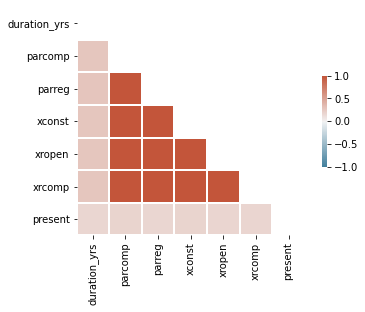

Features with correlation higher than 0.5:


,cc
pairs,
"(duration_yrs, duration_yrs)",1.000000
"(xrcomp, xropen)",0.999602
"(xrcomp, parcomp)",0.999503
"(xconst, xrcomp)",0.999213
"(parcomp, parreg)",0.999162
"(parreg, xrcomp)",0.999158
"(parcomp, xropen)",0.998938
"(xconst, parcomp)",0.998923
"(xconst, xropen)",0.998787


In [18]:
calculate_collinearity(df_refined)

##### Drop features with extreme collinearity

- Remove *xropen* because it is nearly 1:1 correlated with multiple other features, and upon digging into data manual, is conditional upon *xrcomp*. Accordingly, any data contained within the former is also contained within the latter. (see Pages 15 and 16)
- Remove *parcomp* because it is nearly 1:1 correlated with other features, and nearly directly maps to *parreg*, as seen in Table 3.2 of the same data user manual)

In [ ]:
df_refined.drop(['xropen', 'parcomp'], axis=1, inplace=True)
calculate_collinearity(df_refined)

Additional dropping:
- Remove *xrcomp* and *parreg* given the persistent extreme correlation with *xconst*

In [ ]:
df_refined.drop(['xrcomp', 'parreg'], axis=1, inplace=True)
calculate_collinearity(df_refined, min_threshold=0)
df_refined.info()

## Export results!

In [ ]:
# Export to SQL
from sqlalchemy import create_engine
engine = create_engine('sqlite:///../data/processed/regime_changes.db')
with engine.begin() as connection:
    df_refined.to_sql(name='regime_changes', 
                    con=connection, 
                    if_exists='replace', 
                    index=False)

In [ ]:
df_refined.info()